# F20DL Lab 2 

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request



In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading the Data

**Note:** The dataset stores data in a .xslx file (Excel file). This was manually converted to a CSV file.

In [5]:
# Load the dataset into a pandas dataframe
BEANS_PATH = os.path.join("datasets", "DryBeanDataset")

def load_beans_data(beans_path=BEANS_PATH):
    csv_path = os.path.join(beans_path, "Dry_Bean_Dataset.csv")
    return pd.read_csv(csv_path)

In [6]:
beans = load_beans_data()
beans.head()    # Display first 5 rows of the dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Basic Analysis of the Data

In [7]:
# Print some info about the data such as columns and their data types
# The non-null count is useful for checking if there are any missing values.
beans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# Display no. of beans for each type
beans["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [9]:
# Show a statistical summary of each attribute
beans.describe() 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


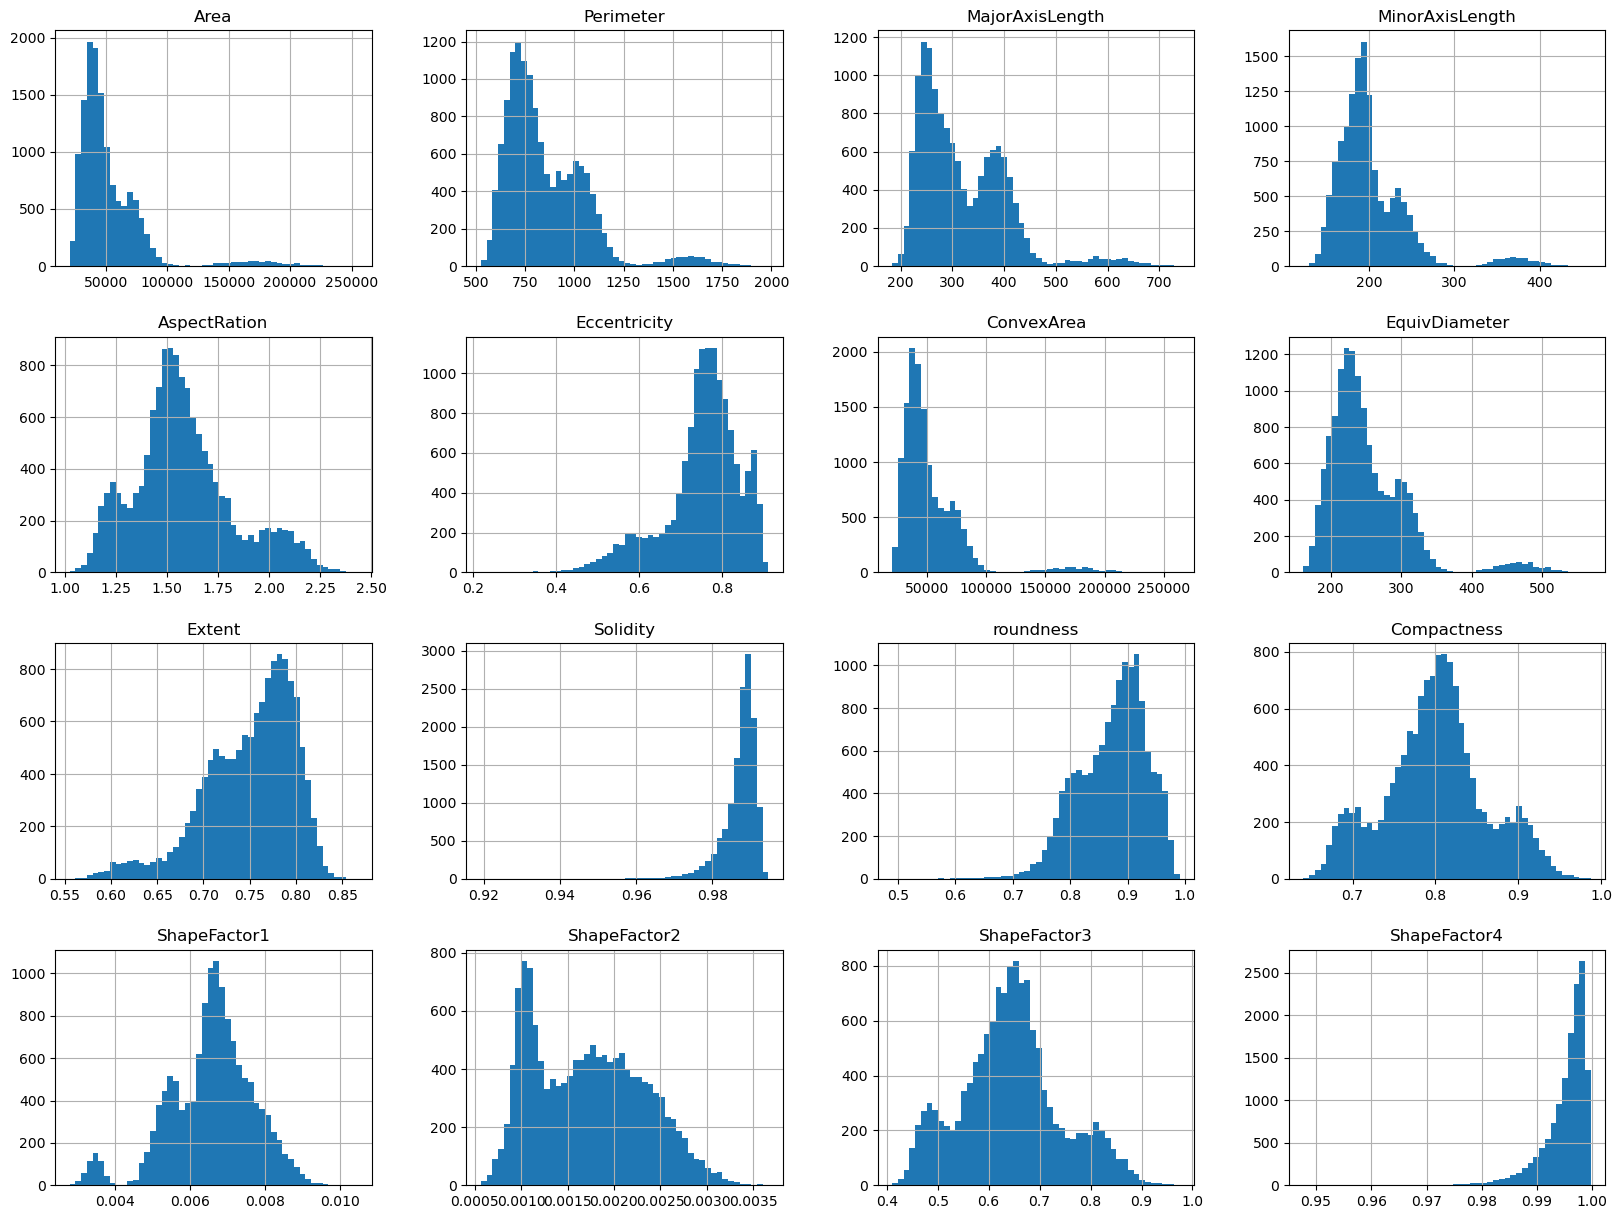

In [10]:
# Histograms for each attribute
# This is useful for identifying which attributes have noticable differences in values which might be useful for machine 
# learning purposes. For example, AspectRation, Compactness, ShapeFactor 2 and 3 have a large spread of values which might vary
# by bean type.
beans.hist(bins=50, figsize=(20,15))
plt.show()

# Finding Correlations in Attributes

In [11]:
# Compute the standard correlation coefficient (Pearson’s r) between every pair of attributes
corr_matrix = beans.corr()

In [12]:
# Display correlation coefficients for MajorAxisLength
# This helps to identify which other attributes influence the values of an attribute. For example, the major axis length is 
# closely correlated with perimeter since increasing the perimeter of a bean will very likely increase its major axis length. 
# The coefficient is only ~0.98 since a bean may be slightly wider (hence have longer perimeter) but still the same length as 
# a slimmer bean.
corr_matrix["MajorAxisLength"].sort_values(ascending=False)

MajorAxisLength    1.000000
Perimeter          0.977338
EquivDiameter      0.961733
ConvexArea         0.932607
Area               0.931834
MinorAxisLength    0.826052
AspectRation       0.550335
Eccentricity       0.541972
Extent            -0.078062
Solidity          -0.284302
ShapeFactor4      -0.482527
ShapeFactor3      -0.568185
Compactness       -0.568377
roundness         -0.596358
ShapeFactor1      -0.773609
ShapeFactor2      -0.859238
Name: MajorAxisLength, dtype: float64

array([[<AxesSubplot:xlabel='MajorAxisLength', ylabel='MajorAxisLength'>,
        <AxesSubplot:xlabel='Perimeter', ylabel='MajorAxisLength'>,
        <AxesSubplot:xlabel='EquivDiameter', ylabel='MajorAxisLength'>,
        <AxesSubplot:xlabel='ConvexArea', ylabel='MajorAxisLength'>,
        <AxesSubplot:xlabel='Area', ylabel='MajorAxisLength'>],
       [<AxesSubplot:xlabel='MajorAxisLength', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='Perimeter', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='EquivDiameter', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='ConvexArea', ylabel='Perimeter'>,
        <AxesSubplot:xlabel='Area', ylabel='Perimeter'>],
       [<AxesSubplot:xlabel='MajorAxisLength', ylabel='EquivDiameter'>,
        <AxesSubplot:xlabel='Perimeter', ylabel='EquivDiameter'>,
        <AxesSubplot:xlabel='EquivDiameter', ylabel='EquivDiameter'>,
        <AxesSubplot:xlabel='ConvexArea', ylabel='EquivDiameter'>,
        <AxesSubplot:xlabel='Area', ylabel='EquivDiameter'>],

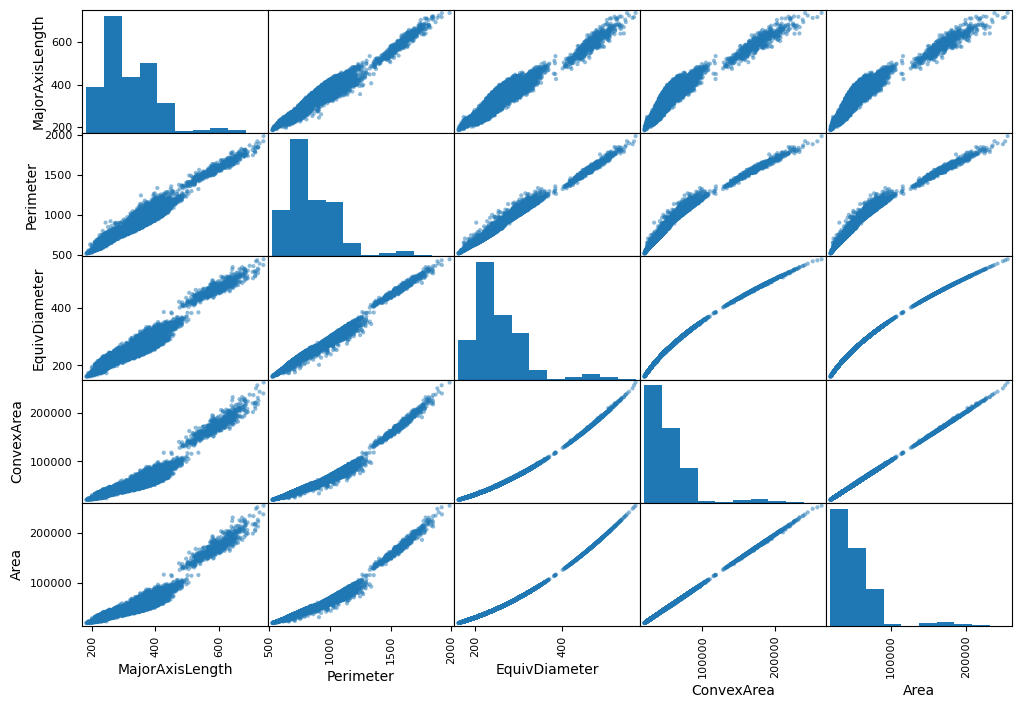

In [13]:
# Plot scatter matrix of some attributes
# This is another way to look for correlation of attributes. A slim, clean line means attributes are closely correlated to each 
# other. For example, Area and EquivDiameter (equivalent diameter) are almost exactly correlated as these values almost 
# directly affect each other (greater area = greater diameter).
from pandas.plotting import scatter_matrix

attributes = ["MajorAxisLength", "Perimeter", "EquivDiameter",
              "ConvexArea", "Area"]
scatter_matrix(beans[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='EquivDiameter', ylabel='Area'>

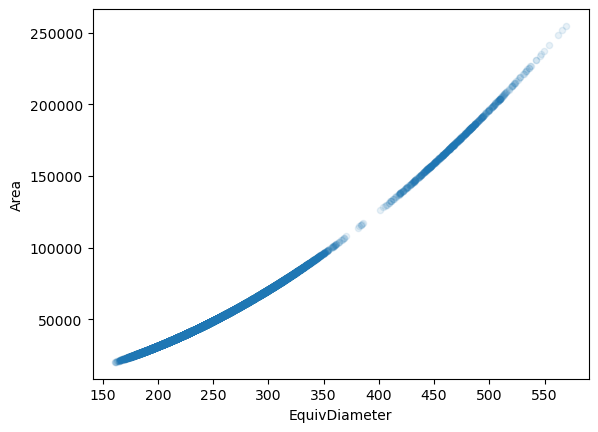

In [14]:
# Zoomed in view of Area against EquivDiamater
beans.plot(kind="scatter", x="EquivDiameter", y="Area", alpha=0.1)